In [2]:
!pip install tensorflow==2.0.0 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

     |████████████████████████████████| 86.3MB 115kB/s 
     |████████████████████████████████| 450kB 38.4MB/s 
     |████████████████████████████████| 3.8MB 24.1MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

Using TensorFlow backend.


In [0]:
"""Reading the training and test text files"""
sst_train_file = tf.data.TextLineDataset("sst_train.txt")
sst_validation_file = tf.data.TextLineDataset("sst_dev.txt")
sst_test_file = tf.data.TextLineDataset("sst_test.txt")

In [0]:
"""Creating the sentence and the label from the dataset"""
def process_path(item):
  sentence = tf.strings.split(item, '\t')[1]
  label = tf.strings.split(tf.strings.split(item, '\t')[0], '__label__')[1]
  return sentence, label
  

In [0]:
"""Creating the label from the dataset"""
def extract_labels(item):
  #sentence = tf.strings.split(item, '\t')[1]
  label = tf.strings.split(tf.strings.split(item, '\t')[0], '__label__')[1]
  return label
  

In [0]:
"""Encode the tensor to unicode"""
def encode_to_unicode(tensor, label):
    return tf.strings.unicode_decode(tensor,
                          input_encoding='utf-8'), label

In [0]:
"""Convert the tensor to one-hot embedding"""
def convert_to_one_hot(tensor, label):
  return tf.one_hot(tensor, depth= 256), tf.strings.to_number(label) - 1

In [0]:
"""Definition of a Simple RNN Model"""
layers = [
  tf.keras.layers.SimpleRNN(units = 32, activation="relu", return_sequences=True),
  tf.keras.layers.GlobalMaxPool1D(data_format='channels_last'),      
  tf.keras.layers.Dense(5, activation="softmax")         
]
def CreateSimpleRNNModel(learning_rate):
  model = tf.keras.Sequential(layers)  
  optimizer_adam = tf.keras.optimizers.Adam(learning_rate)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])
  return model



In [0]:
"""Definition of an RNN with LSTM"""
layers = [          
  tf.keras.layers.LSTM(units = 32, activation="relu", return_sequences=True),
  tf.keras.layers.GlobalMaxPool1D(data_format='channels_last'),      
  tf.keras.layers.Dense(5, activation="softmax")         
]

def CreateLSTMModel(learning_rate):
  model = tf.keras.Sequential(layers)  
  optimizer_adam = tf.keras.optimizers.Adam(learning_rate)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])
  return model

In [0]:
"""Definition of an RNN with GRU"""
layers = [      
  tf.keras.layers.GRU(units = 32, activation="relu", return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalMaxPool1D(data_format='channels_last'),      
  tf.keras.layers.Dense(5, activation="softmax")         
]

def CreateGRUModel(learning_rate):
  model = tf.keras.Sequential(layers)  
  optimizer_adam = tf.keras.optimizers.Adam(learning_rate)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])
  return model

In [0]:
"""Definition of a Bi-directional RNN Model"""
layers = [
  tf.compat.v1.keras.layers.Masking(),
  tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units = 32, activation="relu", return_sequences=True)),
  tf.keras.layers.GlobalMaxPool1D(data_format='channels_last'),      
  tf.keras.layers.Dense(5, activation="softmax")         
]

def CreateBidirectionalRNNModel(learning_rate):
  model = tf.keras.Sequential(layers)    
  optimizer_adam = tf.keras.optimizers.Adam(learning_rate)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])
  return model



In [0]:
# Function that takes in the history object and plots a graph
import pandas as pd
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Training Loss')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Loss')
  
  plt.ylim([0, 3])
  plt.legend()
  plt.show()

In [0]:
training_data = sst_train_file.map(process_path).map(encode_to_unicode).map(convert_to_one_hot).padded_batch(64, padded_shapes = ([-1, -1], []))
validation_dataset = sst_validation_file.map(process_path).map(encode_to_unicode).map(convert_to_one_hot).padded_batch(64, padded_shapes = ([-1, -1], []))
test_data = sst_test_file.map(process_path).map(encode_to_unicode).map(convert_to_one_hot).padded_batch(64, padded_shapes = ([-1, -1], []))
extracted_test_data_labels = sst_test_file.map(extract_labels)


In [0]:
"""Simple RNN Model with a learning rate of 0.01"""
model = CreateSimpleRNNModel(0.01)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)
predictions = model.predict(test_data)
model.evaluate(test_data)

Epoch 1/5
      2/Unknown - 3s 2s/step - loss: 1.6283 - accuracy: 0.1875

KeyboardInterrupt: ignored

Epoch 1/5
134/134 [==============================] - 39s 292ms/step - loss: 1.7922 - accuracy: 0.2603 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 36s 270ms/step - loss: 1.7330 - accuracy: 0.2281 - val_loss: 1.6134 - val_accuracy: 0.2670
Epoch 3/5
134/134 [==============================] - 36s 272ms/step - loss: 1.6587 - accuracy: 0.2347 - val_loss: 1.5880 - val_accuracy: 0.2688
Epoch 4/5
134/134 [==============================] - 37s 273ms/step - loss: 1.6277 - accuracy: 0.2389 - val_loss: 1.5777 - val_accuracy: 0.2698
Epoch 5/5
134/134 [==============================] - 36s 271ms/step - loss: 1.6109 - accuracy: 0.2384 - val_loss: 1.5728 - val_accuracy: 0.2707


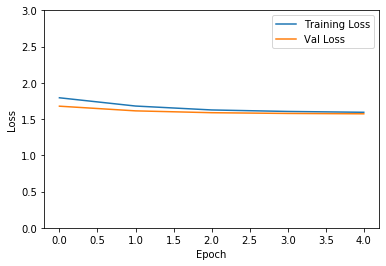

In [0]:
"""Simple RNN Model with a learning rate of 0.001"""
model = CreateSimpleRNNModel(0.001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)
#predictions = model.predict(test_data)
#model.evaluate(test_data)

Epoch 1/5
134/134 [==============================] - 39s 293ms/step - loss: 1.5778 - accuracy: 0.2614 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 36s 270ms/step - loss: 1.5909 - accuracy: 0.2611 - val_loss: 1.5693 - val_accuracy: 0.2725
Epoch 3/5
134/134 [==============================] - 37s 274ms/step - loss: 1.5870 - accuracy: 0.2608 - val_loss: 1.5682 - val_accuracy: 0.2725
Epoch 4/5
134/134 [==============================] - 36s 271ms/step - loss: 1.5835 - accuracy: 0.2584 - val_loss: 1.5673 - val_accuracy: 0.2725
Epoch 5/5
134/134 [==============================] - 36s 272ms/step - loss: 1.5803 - accuracy: 0.2580 - val_loss: 1.5666 - val_accuracy: 0.2688


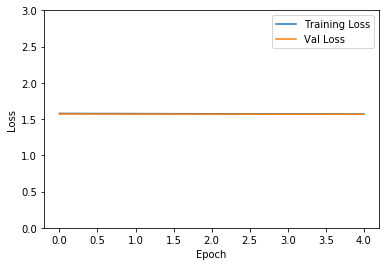

In [0]:
"""Simple RNN Model with a learning rate of 0.0001"""
model = CreateSimpleRNNModel(0.0001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)
#predictions = model.predict(test_data)
#model.evaluate(test_data)

Epoch 1/5
134/134 [==============================] - 39s 293ms/step - loss: 1.3477 - accuracy: 0.4416 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 37s 273ms/step - loss: 1.4841 - accuracy: 0.4092 - val_loss: 1.8106 - val_accuracy: 0.2698
Epoch 3/5
134/134 [==============================] - 37s 275ms/step - loss: 1.4310 - accuracy: 0.4224 - val_loss: 1.7922 - val_accuracy: 0.2698
Epoch 4/5
134/134 [==============================] - 37s 274ms/step - loss: 1.4129 - accuracy: 0.4318 - val_loss: 1.8892 - val_accuracy: 0.2679
Epoch 5/5
134/134 [==============================] - 37s 276ms/step - loss: 1.4171 - accuracy: 0.4318 - val_loss: 1.8269 - val_accuracy: 0.2661


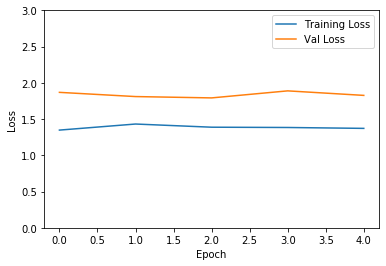

In [0]:
"""LSTM Model with a learning rate of 0.01"""
model = CreateLSTMModel(0.01)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)
#predictions = model.predict(test_data)
#model.evaluate(test_data)

Epoch 1/5
134/134 [==============================] - 40s 298ms/step - loss: 1.8076 - accuracy: 0.2589 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 37s 276ms/step - loss: 1.7709 - accuracy: 0.2585 - val_loss: 1.6309 - val_accuracy: 0.2707
Epoch 3/5
134/134 [==============================] - 37s 276ms/step - loss: 1.6868 - accuracy: 0.2412 - val_loss: 1.5926 - val_accuracy: 0.2698
Epoch 4/5
134/134 [==============================] - 37s 275ms/step - loss: 1.6363 - accuracy: 0.2224 - val_loss: 1.5768 - val_accuracy: 0.2707
Epoch 5/5
134/134 [==============================] - 37s 274ms/step - loss: 1.6102 - accuracy: 0.2303 - val_loss: 1.5700 - val_accuracy: 0.2752


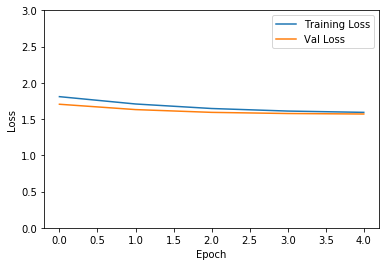

In [0]:
"""LSTM Model with a learning rate of 0.001"""
model = CreateLSTMModel(0.001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)
#predictions = model.predict(test_data)
#model.evaluate(test_data)

Epoch 1/5
134/134 [==============================] - 40s 298ms/step - loss: 1.5731 - accuracy: 0.2630 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 37s 274ms/step - loss: 1.5862 - accuracy: 0.2636 - val_loss: 1.5677 - val_accuracy: 0.2761
Epoch 3/5
134/134 [==============================] - 37s 278ms/step - loss: 1.5837 - accuracy: 0.2659 - val_loss: 1.5669 - val_accuracy: 0.2797
Epoch 4/5
134/134 [==============================] - 37s 273ms/step - loss: 1.5813 - accuracy: 0.2658 - val_loss: 1.5661 - val_accuracy: 0.2807
Epoch 5/5
134/134 [==============================] - 37s 277ms/step - loss: 1.5790 - accuracy: 0.2674 - val_loss: 1.5655 - val_accuracy: 0.2843


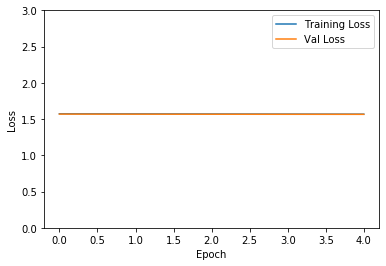

In [0]:
"""LSTM Model with a learning rate of 0.0001"""
model = CreateLSTMModel(0.0001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)
#predictions = model.predict(test_data)
#model.evaluate(test_data)

Epoch 1/5
134/134 [==============================] - 40s 296ms/step - loss: 1.5771 - accuracy: 0.2590 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 36s 271ms/step - loss: 1.5808 - accuracy: 0.2568 - val_loss: 1.5641 - val_accuracy: 0.2797
Epoch 3/5
134/134 [==============================] - 37s 273ms/step - loss: 1.5827 - accuracy: 0.2525 - val_loss: 1.5650 - val_accuracy: 0.2788
Epoch 4/5
134/134 [==============================] - 37s 274ms/step - loss: 1.5836 - accuracy: 0.2493 - val_loss: 1.5649 - val_accuracy: 0.2843
Epoch 5/5
134/134 [==============================] - 36s 272ms/step - loss: 1.5830 - accuracy: 0.2485 - val_loss: 1.5650 - val_accuracy: 0.2816


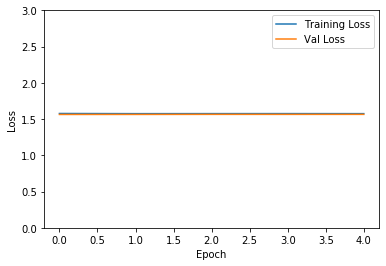

35/35 [==============================] - 4s 109ms/step - loss: 1.5693 - accuracy: 0.2946


[1.5693431990487234, 0.29457015]

In [0]:
"""GRU Model with a learning rate of 0.01"""
model = CreateGRUModel(0.001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)
predictions = model.predict(test_data)
model.evaluate(test_data)

Epoch 1/5
134/134 [==============================] - 40s 296ms/step - loss: 1.5727 - accuracy: 0.2594 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 37s 275ms/step - loss: 1.5770 - accuracy: 0.2575 - val_loss: 1.5655 - val_accuracy: 0.2743
Epoch 3/5
134/134 [==============================] - 37s 275ms/step - loss: 1.5796 - accuracy: 0.2536 - val_loss: 1.5659 - val_accuracy: 0.2743
Epoch 4/5
134/134 [==============================] - 37s 275ms/step - loss: 1.5798 - accuracy: 0.2536 - val_loss: 1.5666 - val_accuracy: 0.2788
Epoch 5/5
134/134 [==============================] - 37s 274ms/step - loss: 1.5801 - accuracy: 0.2522 - val_loss: 1.5669 - val_accuracy: 0.2761


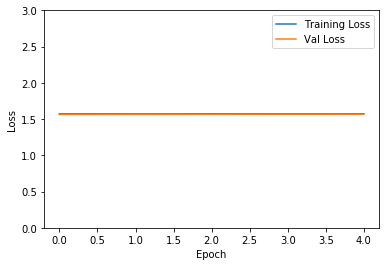

35/35 [==============================] - 4s 108ms/step - loss: 1.5686 - accuracy: 0.2910


[1.5686221633638655, 0.29095024]

In [0]:
"""GRU Model with a learning rate of 0.001"""
model = CreateGRUModel(0.001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)
predictions = model.predict(test_data)
model.evaluate(test_data)

Epoch 1/5
134/134 [==============================] - 40s 297ms/step - loss: 1.5598 - accuracy: 0.2707 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 37s 274ms/step - loss: 1.5679 - accuracy: 0.2700 - val_loss: 1.5661 - val_accuracy: 0.2698
Epoch 3/5
134/134 [==============================] - 37s 275ms/step - loss: 1.5665 - accuracy: 0.2729 - val_loss: 1.5659 - val_accuracy: 0.2725
Epoch 4/5
134/134 [==============================] - 37s 276ms/step - loss: 1.5652 - accuracy: 0.2761 - val_loss: 1.5657 - val_accuracy: 0.2716
Epoch 5/5
134/134 [==============================] - 37s 275ms/step - loss: 1.5640 - accuracy: 0.2805 - val_loss: 1.5655 - val_accuracy: 0.2752


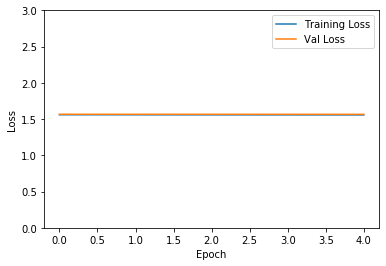

35/35 [==============================] - 4s 108ms/step - loss: 1.5658 - accuracy: 0.2887


[1.5658309425626482, 0.2886878]

In [0]:
"""GRU Model with a learning rate of 0.0001"""
model = CreateGRUModel(0.0001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)
predictions = model.predict(test_data)
model.evaluate(test_data)

Epoch 1/5
134/134 [==============================] - 24s 182ms/step - loss: 1.2905 - accuracy: 0.4485 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 22s 163ms/step - loss: 1.3452 - accuracy: 0.4414 - val_loss: 1.6462 - val_accuracy: 0.2534
Epoch 3/5
134/134 [==============================] - 22s 163ms/step - loss: 1.3246 - accuracy: 0.4354 - val_loss: 1.6371 - val_accuracy: 0.2534
Epoch 4/5
134/134 [==============================] - 22s 164ms/step - loss: 1.3208 - accuracy: 0.4314 - val_loss: 1.6469 - val_accuracy: 0.2534
Epoch 5/5
134/134 [==============================] - 22s 164ms/step - loss: 1.3261 - accuracy: 0.4418 - val_loss: 1.6542 - val_accuracy: 0.2534


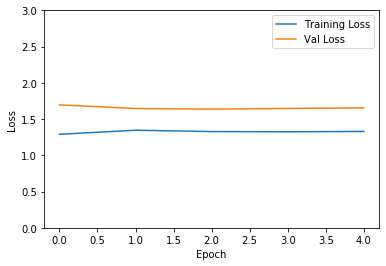

In [0]:
"""Simple RNN Model with a learning rate of 0.01, hidden layers of 64 and activation of tanh """
layers = [
  tf.keras.layers.SimpleRNN(units = 64, activation="tanh", return_sequences=True),
  tf.keras.layers.GlobalMaxPool1D(data_format='channels_last'),      
  tf.keras.layers.Dense(5, activation="softmax")         
]


model = CreateSimpleRNNModel(0.01)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)


{'loss': [1.2901278591334597, 1.3462174791521795, 1.3278368823090743, 1.3247638396109536, 1.3293202816323841], 'accuracy': [0.44850188, 0.44136235, 0.43539324, 0.43141386, 0.44183052], 'val_loss': [1.696086711353726, 1.6461826033062406, 1.6370593508084614, 1.6468898918893602, 1.6542046003871493], 'val_accuracy': [0.253406, 0.253406, 0.253406, 0.253406, 0.253406]}


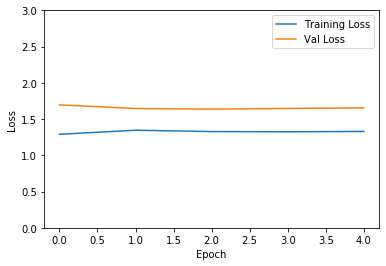

In [0]:
"""LSTM Model with a learning rate of 0.001, hidden layers of 64 units and activation of tanh"""
layers = [
  tf.keras.layers.SimpleRNN(units = 64, activation="tanh", return_sequences=True),
  tf.keras.layers.GlobalMaxPool1D(data_format='channels_last'),      
  tf.keras.layers.Dense(5, activation="softmax")         
]

model = CreateLSTMModel(0.001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)

Epoch 1/5
134/134 [==============================] - 24s 177ms/step - loss: 1.6785 - accuracy: 0.1683 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 22s 164ms/step - loss: 1.6312 - accuracy: 0.2528 - val_loss: 1.5783 - val_accuracy: 0.2625
Epoch 3/5
134/134 [==============================] - 22s 165ms/step - loss: 1.6117 - accuracy: 0.2434 - val_loss: 1.5743 - val_accuracy: 0.2625
Epoch 4/5
134/134 [==============================] - 22s 164ms/step - loss: 1.6083 - accuracy: 0.2396 - val_loss: 1.5730 - val_accuracy: 0.2625
Epoch 5/5
134/134 [==============================] - 22s 166ms/step - loss: 1.6048 - accuracy: 0.2382 - val_loss: 1.5717 - val_accuracy: 0.2634


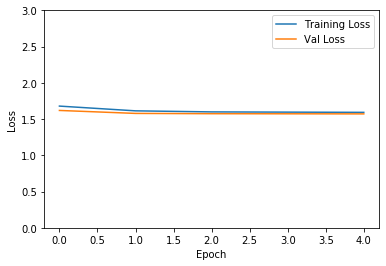

In [0]:
"""GRU Model with a learning rate of 0.0001, hidden layers of 64 and activation function of tanh"""
layers = [
  tf.keras.layers.SimpleRNN(units = 64, activation="tanh", return_sequences=True),
  tf.keras.layers.GlobalMaxPool1D(data_format='channels_last'),      
  tf.keras.layers.Dense(5, activation="softmax")         
]

model = CreateGRUModel(0.0001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)


In [15]:
"""Bi-directional RNN Model using Simple RNN with a learning rate of 0.001 """
model = CreateBidirectionalRNNModel(0.001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)


Epoch 1/5
      1/Unknown - 1s 892ms/step

ValueError: ignored

Epoch 1/5
134/134 [==============================] - 24s 176ms/step - loss: 1.3277 - accuracy: 0.4408 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 22s 164ms/step - loss: 1.4052 - accuracy: 0.4311 - val_loss: 1.7545 - val_accuracy: 0.2480
Epoch 3/5
134/134 [==============================] - 22s 165ms/step - loss: 1.3569 - accuracy: 0.4383 - val_loss: 1.7182 - val_accuracy: 0.2543
Epoch 4/5
134/134 [==============================] - 22s 164ms/step - loss: 1.3573 - accuracy: 0.4403 - val_loss: 1.8731 - val_accuracy: 0.2016
Epoch 5/5
134/134 [==============================] - 22s 165ms/step - loss: 1.3876 - accuracy: 0.4338 - val_loss: 1.8298 - val_accuracy: 0.1771


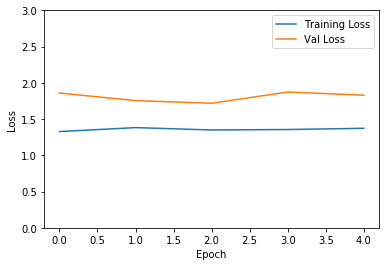

In [0]:
"""Bi-directional RNN Model using Simple RNN with a learning rate of 0.01 """
model = CreateBidirectionalRNNModel(0.01)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)

Epoch 1/5
134/134 [==============================] - 24s 182ms/step - loss: 1.8072 - accuracy: 0.2163 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 22s 166ms/step - loss: 1.7887 - accuracy: 0.2628 - val_loss: 1.6903 - val_accuracy: 0.2570
Epoch 3/5
134/134 [==============================] - 22s 166ms/step - loss: 1.7191 - accuracy: 0.2636 - val_loss: 1.6406 - val_accuracy: 0.2725
Epoch 4/5
134/134 [==============================] - 23s 168ms/step - loss: 1.6686 - accuracy: 0.2587 - val_loss: 1.6095 - val_accuracy: 0.2752
Epoch 5/5
134/134 [==============================] - 22s 166ms/step - loss: 1.6339 - accuracy: 0.2568 - val_loss: 1.5908 - val_accuracy: 0.2761


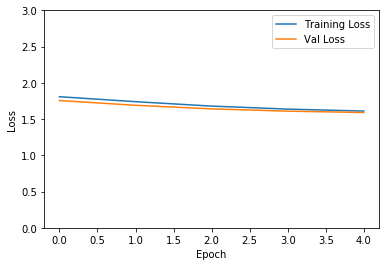

In [0]:
"""Bi-directional RNN Model using Simple RNN with a learning rate of 0.0001 """
model = CreateBidirectionalRNNModel(0.0001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)

In [0]:
def Compute_Precision(mat):
    columnar_sum = np.sum(mat, axis = 0)
    precision_val = []
    for i in range(len(columnar_sum)):
      precision = mat[i][i]/(columnar_sum[i] + 0.000001)
      precision_val = np.append(precision_val, precision)
      print('Precision for class: {0} {1}'.format((i), precision))
    return precision_val

def Compute_Recall(mat):
    columnar_sum = np.sum(mat, axis = 1)
    recall_val = []
    for i in range(len(columnar_sum)):
      recall = mat[i][i]/(columnar_sum[i] + 0.000001)
      recall_val = np.append(recall_val, recall)
      print('Recall for class: {0} {1}'.format((i), recall))
    return recall_val

def Compute_F1Score(precision, recall):
  for i in range(len(precision)):
    print('F1 Score for Class {0} {1}'.format(i, 2*((precision[i] * recall[i])/ (precision[i] + recall[i] + 0.000001))))











In [0]:

#tf.argmax(input=predictions, axis=1)
import numpy as np
def Create_Labels_to_plot_Confusion_Matrix(predictions):
  pred_val = np.zeros(len(predictions))
  for i in range(len(predictions)):
    pred_val[i] = np.argmax(predictions[i])

  label_count = 0
  for i in extracted_test_data_labels:
    label_count = label_count + 1

  test_labels = []
  for i in extracted_test_data_labels:
    test_labels = np.append(test_labels, int(i.numpy()))

  return test_labels, pred_val

hi
Precision for class: 0 nan
Precision for class: 1 0.1383177570093458
Precision for class: 2 nan
Precision for class: 3 0.1736842105263158
Precision for class: 4 nan
Precision for class: 5 nan
Recall for class: 0 nan
Recall for class: 1 0.5304659498207885
Recall for class: 2 0.0
Recall for class: 3 0.5089974293059126
Recall for class: 4 0.0
Recall for class: 5 0.0
F1 Score for Class 0 nan
F1 Score for Class 1 0.21942179392142325
F1 Score for Class 2 nan
F1 Score for Class 3 0.25899280575539574
F1 Score for Class 4 nan
F1 Score for Class 5 nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [24]:
"""Best Simple RNN Model with a learning rate of 0.0001"""
model = CreateSimpleRNNModel(0.0001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)

predictions = model.predict(test_data)
model.evaluate(test_data)
test_labels, pred_val = Create_Labels_to_plot_Confusion_Matrix(predictions)
mat = tf.math.confusion_matrix(test_labels, pred_val)
precision = Compute_Precision(mat.numpy())
recall = Compute_Recall(mat.numpy())
F1Score = Compute_F1Score(precision, recall)

print(precision)
print(recall)
print(F1Score)
print(mat)

Epoch 1/5
      1/Unknown - 1s 731ms/step

KeyboardInterrupt: ignored

Epoch 1/5
134/134 [==============================] - 48s 360ms/step - loss: 1.5711 - accuracy: 0.2580 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 43s 322ms/step - loss: 1.5662 - accuracy: 0.2596 - val_loss: 1.5639 - val_accuracy: 0.2679
Epoch 3/5
134/134 [==============================] - 43s 321ms/step - loss: 1.5679 - accuracy: 0.2481 - val_loss: 1.5635 - val_accuracy: 0.2652
Epoch 4/5
134/134 [==============================] - 43s 321ms/step - loss: 1.5684 - accuracy: 0.2443 - val_loss: 1.5631 - val_accuracy: 0.2634
Epoch 5/5
134/134 [==============================] - 43s 320ms/step - loss: 1.5685 - accuracy: 0.2430 - val_loss: 1.5628 - val_accuracy: 0.2634


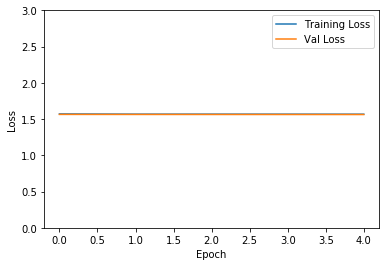

Precision for class: 0 nan
Precision for class: 1 0.1279445727482679
Precision for class: 2 nan
Precision for class: 3 0.06666666666666667
Precision for class: 4 nan
Precision for class: 5 nan
Recall for class: 0 nan
Recall for class: 1 0.992831541218638
Recall for class: 2 0.0
Recall for class: 3 0.007712082262210797
Recall for class: 4 0.0
Recall for class: 5 0.0
F1 Score for Class 0 nan
F1 Score for Class 1 0.22667757774140757
F1 Score for Class 2 nan
F1 Score for Class 3 0.013824884792626725
F1 Score for Class 4 nan
F1 Score for Class 5 nan
[       nan 0.12794457        nan 0.06666667        nan        nan]
[       nan 0.99283154 0.         0.00771208 0.         0.        ]
None
tf.Tensor(
[[  0   0   0   0   0   0]
 [  0 277   0   2   0   0]
 [  0 623   0  10   0   0]
 [  0 386   0   3   0   0]
 [  0 496   0  14   0   0]
 [  0 383   0  16   0   0]], shape=(6, 6), dtype=int32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [0]:
"""Best LSTM Model with a learning rate of 0.0001"""
model = CreateLSTMModel(0.0001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)
predictions = model.predict(test_data)
model.evaluate(test_data)
test_labels, pred_val = Create_Labels_to_plot_Confusion_Matrix(predictions)
mat = tf.math.confusion_matrix(test_labels, pred_val)
precision = Compute_Precision(mat.numpy())
recall = Compute_Recall(mat.numpy())
F1Score = Compute_F1Score(precision, recall)

print(precision)
print(recall)
print(F1Score)
print(mat)

Epoch 1/5
134/134 [==============================] - 47s 348ms/step - loss: 1.5673 - accuracy: 0.2596 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 44s 325ms/step - loss: 1.5644 - accuracy: 0.2564 - val_loss: 1.5623 - val_accuracy: 0.2698
Epoch 3/5
134/134 [==============================] - 44s 331ms/step - loss: 1.5655 - accuracy: 0.2474 - val_loss: 1.5619 - val_accuracy: 0.2625
Epoch 4/5
134/134 [==============================] - 45s 335ms/step - loss: 1.5658 - accuracy: 0.2453 - val_loss: 1.5616 - val_accuracy: 0.2616
Epoch 5/5
134/134 [==============================] - 44s 331ms/step - loss: 1.5657 - accuracy: 0.2447 - val_loss: 1.5613 - val_accuracy: 0.2625


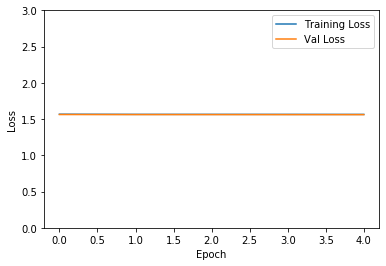

Precision for class: 0 nan
Precision for class: 1 0.127669452181987
Precision for class: 2 nan
Precision for class: 3 0.07142857142857142
Precision for class: 4 nan
Precision for class: 5 nan
Recall for class: 0 nan
Recall for class: 1 0.985663082437276
Recall for class: 2 0.0
Recall for class: 3 0.010282776349614395
Recall for class: 4 0.0
Recall for class: 5 0.0
F1 Score for Class 0 nan
F1 Score for Class 1 0.22605836415947395
F1 Score for Class 2 nan
F1 Score for Class 3 0.017977528089887635
F1 Score for Class 4 nan
F1 Score for Class 5 nan
[       nan 0.12766945        nan 0.07142857        nan        nan]
[       nan 0.98566308 0.         0.01028278 0.         0.        ]
None
tf.Tensor(
[[  0   0   0   0   0   0]
 [  0 275   0   4   0   0]
 [  0 622   0  11   0   0]
 [  0 385   0   4   0   0]
 [  0 494   0  16   0   0]
 [  0 378   0  21   0   0]], shape=(6, 6), dtype=int32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [0]:
"""Best GRU Model with a learning rate of 0.0001"""
model = CreateGRUModel(0.0001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)
predictions = model.predict(test_data)
model.evaluate(test_data)
test_labels, pred_val = Create_Labels_to_plot_Confusion_Matrix(predictions)
mat = tf.math.confusion_matrix(test_labels, pred_val)
precision = Compute_Precision(mat.numpy())
recall = Compute_Recall(mat.numpy())
F1Score = Compute_F1Score(precision, recall)

print(precision)
print(recall)
print(F1Score)
print(mat)

Epoch 1/5
134/134 [==============================] - 48s 359ms/step - loss: 1.5639 - accuracy: 0.2626 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
134/134 [==============================] - 44s 328ms/step - loss: 1.5614 - accuracy: 0.2609 - val_loss: 1.5608 - val_accuracy: 0.2716
Epoch 3/5
134/134 [==============================] - 45s 332ms/step - loss: 1.5626 - accuracy: 0.2513 - val_loss: 1.5605 - val_accuracy: 0.2670
Epoch 4/5
134/134 [==============================] - 44s 325ms/step - loss: 1.5628 - accuracy: 0.2492 - val_loss: 1.5602 - val_accuracy: 0.2661
Epoch 5/5
134/134 [==============================] - 43s 320ms/step - loss: 1.5627 - accuracy: 0.2478 - val_loss: 1.5600 - val_accuracy: 0.2670


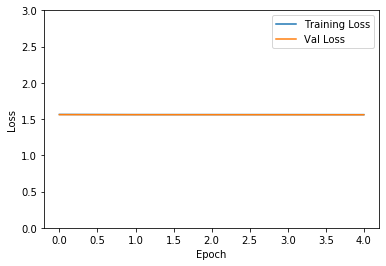

tf.Tensor(
[[  0   0   0   0   0   0]
 [  0 274   0   5   0   0]
 [  0 619   0  14   0   0]
 [  0 383   0   6   0   0]
 [  0 486   0  24   0   0]
 [  0 378   0  21   0   0]], shape=(6, 6), dtype=int32)
Precision for class: 0 nan
Precision for class: 1 0.1280373831775701
Precision for class: 2 nan
Precision for class: 3 0.08571428571428572
Precision for class: 4 nan
Precision for class: 5 nan
Recall for class: 0 nan
Recall for class: 1 0.982078853046595
Recall for class: 2 0.0
Recall for class: 3 0.015424164524421594
Recall for class: 4 0.0
Recall for class: 5 0.0
F1 Score for Class 0 nan
F1 Score for Class 1 0.22653989251756923
F1 Score for Class 2 nan
F1 Score for Class 3 0.026143790849673203
F1 Score for Class 4 nan
F1 Score for Class 5 nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [0]:
"""Best GRU Model with a learning rate of 0.0001"""
model = CreateGRUModel(0.0001)
fit_model = model.fit(x = training_data, validation_data = validation_dataset, epochs = 5)
plot_history(fit_model)
model.evaluate(test_data)
predictions = model.predict(test_data)

test_labels, pred_val = Create_Labels_to_plot_Confusion_Matrix(predictions)
mat = tf.math.confusion_matrix(test_labels, pred_val)
print(mat)
precision = Compute_Precision(mat.numpy())
recall = Compute_Recall(mat.numpy())
F1Score = Compute_F1Score(precision, recall)